In [ ]:
import csv
import numpy as np
import math

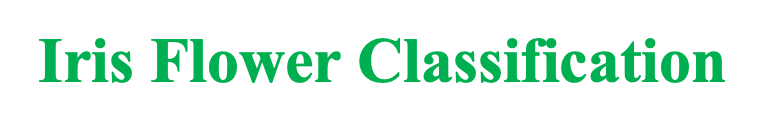

In [ ]:
file = open("/content/Iris.csv", "r")
dataset = csv.reader(file)
dataset = np.array(list(dataset))
dataset = np.delete(dataset, 0, 0)
dataset = np.delete(dataset, 0, 1)
file.close()

trainingSet = dataset[:149]
testingSet = dataset[149:]


In [ ]:
def computeDistance(dataPoint1, dataPoint2):
  result = 0
  for i in range(4):
    result += (float(dataPoint1[i]) - float(dataPoint2[i]))**2
  return math.sqrt(result)


In [ ]:
def computeKnearestNeighbor(trainingSet, item, k):
  distances = []
  for dataPoint in trainingSet:
    distances.append(
        {
            "label": dataPoint[-1],
            "value": computeDistance(item, dataPoint)
        }
    )
  distances.sort(key=lambda x: x["value"])
  labels = [item["label"] for item in distances]
  return labels[:k]

In [ ]:
def voteTheDistances(array):
  labels = set(array)
  result = ""
  maxOccur = 0
  for label in labels:
    num = array.count(label)
    if(num > maxOccur):
      maxOccur = num
      result = label

  return result

In [ ]:
k = 5
# print(testingSet)
for item in testingSet:
  knn = computeKnearestNeighbor(trainingSet, item, k)
  result = voteTheDistances(knn)
  print("GT = ", item[-1], ", Prediction: =", result)

GT =  Iris-virginica , Prediction: = Iris-virginica


### How to select K in K-NN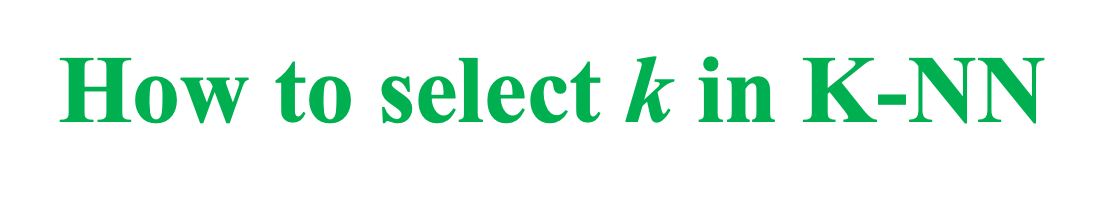

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the dataset in
dataset = pd.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred != y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(y_test, y_pred),2))

0.97


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Accuracy')

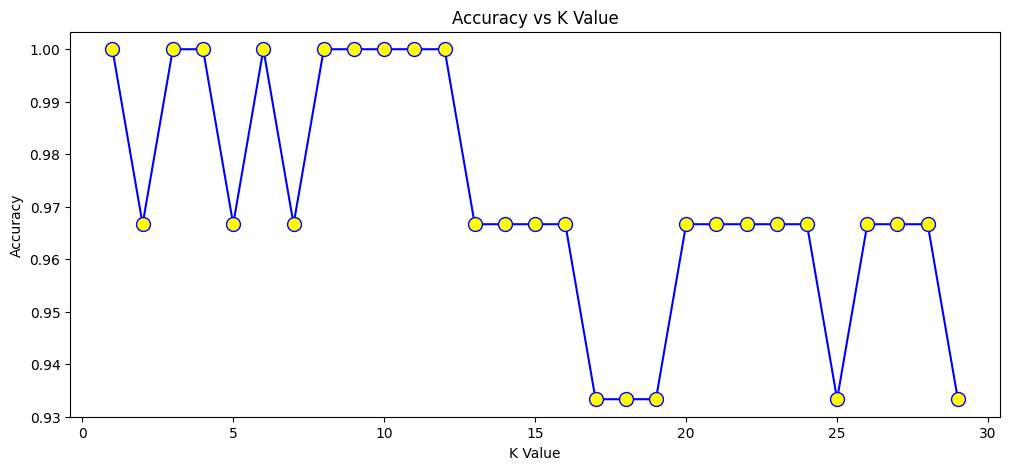

In [ ]:
error = []
# Calculating accuracy for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(accuracy_score(pred_i,y_test))

plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
df = pd.read_csv('/content/TeleCustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
X = df.drop(['custcat'], axis = 1)
y = df['custcat']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


Minimum error: 0.615 at K = 37


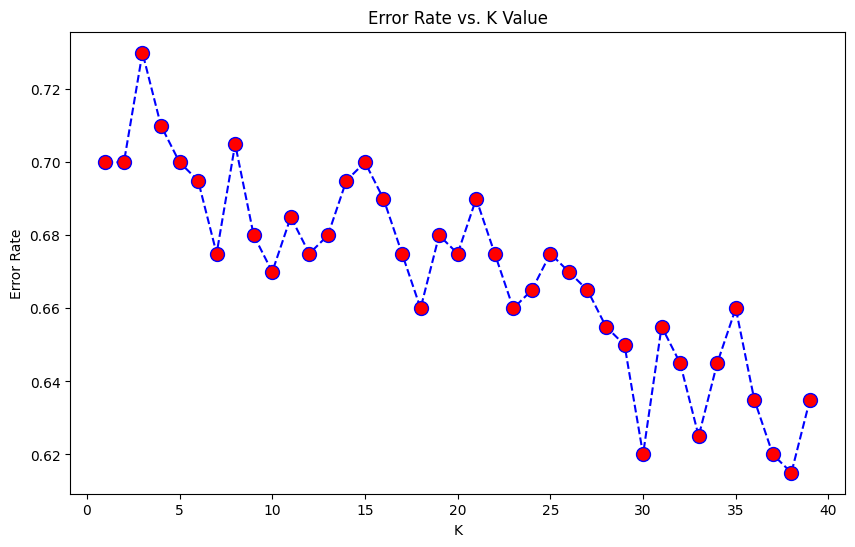

In [ ]:
from sklearn import neighbors, datasets


error_rate = []
for i in range(1,40):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i,weights = 'distance')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.385 at K = 37


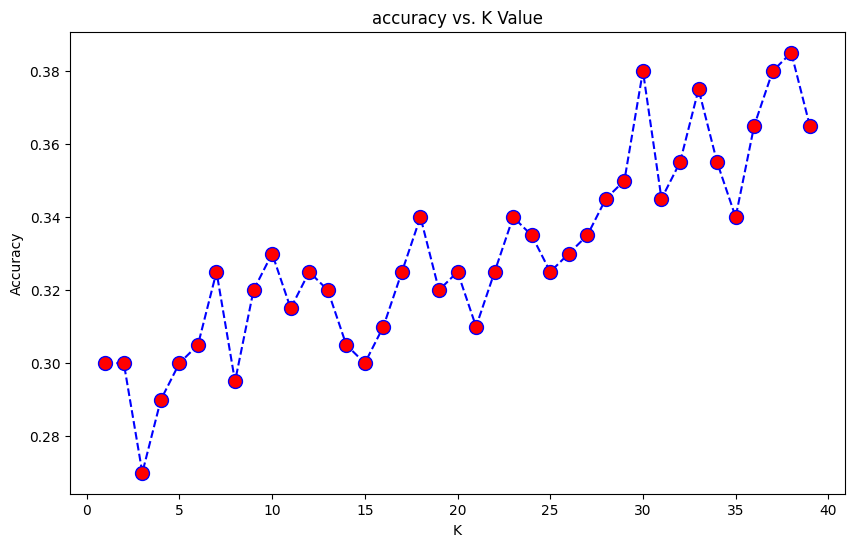

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i,weights = 'distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

### Problem with K odd and even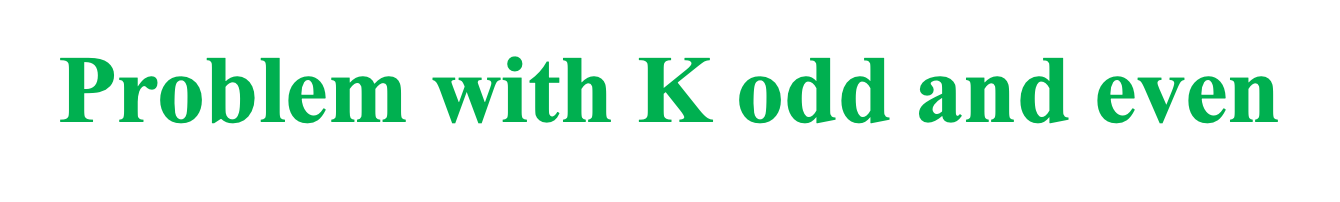

In [ ]:
#Required Libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
penguin= pd.read_csv("/content/penguins.csv")
penguin.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE


In [ ]:
x = penguin[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
y = penguin[['species']]

In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify = y,random_state = 4)

In [ ]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
def knn_modified(X_train,y_train,X_test,k):
    pred = []
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i,])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue

        #Sort the list by distance
        distance.sort()

        # print("distance", distance)
        #Get the row index of its nearest neighbour
        neighbours = []

        for m in range(k):
            neighbours.append(distance[m][1])

        # print("j,", j)
        #Append the actual target in a list
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        # print("target", target)
        #Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t,0) + 1

        #Create a list with (value, key) pair
        pairs = []
        for key in count:
            pairs.append((count[key], key))

        #Sort the pair and get the most occurring word
        pairs.sort(reverse=True)
        # print("pairs",pairs)
        if k%2 == 0:
            even = []
            for i in range(0,len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])
            # print('Arranging in decreasing order: ',even)
            # print("neighbours", neighbours)
            for n in neighbours:
                if y_train[n][0] in even:
                    pred.append(y_train[n][0])
                    #print('Value with the least distance classifies: ',y_train[j][0])
                    #print('Picking classifier based on least distance: ',y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
        else:
            pred.append(pairs[0][1])

    return(pred)

In [ ]:
n = 4
pred = knn_modified(X_train,y_train,X_test[30,:].reshape(1,4),k=4)
print(pred)

['Adelie']


In [ ]:
n = 2
pred = knn_modified(X_train,y_train,X_test,k=n)

neighbors = list(range(1,10))
scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,
                               algorithm='brute',
                               metric='euclidean')
    pred1 = knn.fit(X_train, y_train)
    pred = pred1.predict(X_test)
    accuracy =  accuracy_score(y_test, pred)
    scores.append(accuracy)


scores1 = []
neighbors = list(range(1,10))
for i in neighbors:
    pred = knn_modified(X_train,y_train,X_test,k=i)
    accuracy =  accuracy_score(y_test, pred)
    scores1.append(accuracy)

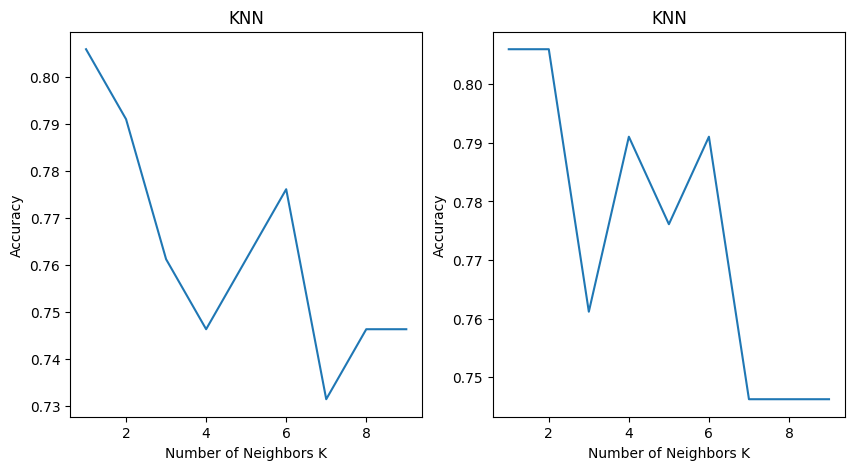

In [ ]:
MSE = [ x for x in scores]
plt.figure(figsize=(10, 5))
MSE1 = [ x for x in scores1]
plt.subplot(1,2,1)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.subplot(1,2,2)
plt.plot(neighbors, MSE1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show()

In [ ]:
print("\t\t KNN in SKlearn  \t Modified KNN")
for i in range(0,4):
    print("k = ",i+1, "\t\t     ",round(scores[i],3),"\t\t    ",round(scores1[i],3))

		 KNN in SKlearn  	 Modified KNN
k =  1 		      0.806 		     0.806
k =  2 		      0.791 		     0.806
k =  3 		      0.761 		     0.761
k =  4 		      0.746 		     0.791


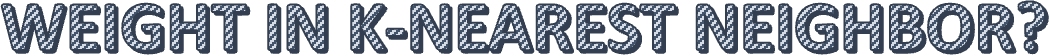

In [ ]:
from sklearn import datasets

dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8, weights = 'uniform', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("accuracy %.2f%%"%(100*accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy 94.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      0.97      0.94        30
           2       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8, p = 2, weights="distance")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("accuracy %.2f%%"%(100*accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy 96.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
def customizeWeight(distances):
  sigma = 0.5
  return np.exp(-distances**2/sigma)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4, p = 2, weights=customizeWeight)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("accuracy %.2f%%"%(100*accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy 93.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
import numpy as np
from collections import Counter

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build KDTree
tree = KDTree(X_train, leaf_size=2)

# Select one test sample
x_query = X_test[0]
true_label = y_test[0]

# Query the 3 nearest neighbors
k = 3
distances, indices = tree.query([x_query], k=k)
neighbors = y_train[indices[0]]

# Majority vote
predicted_label = Counter(neighbors).most_common(1)[0][0]

# Print results
print(f"Test sample: {x_query}")
print(f"True label: {true_label} ({iris.target_names[true_label]})")
print(f"Nearest neighbors' labels: {neighbors}")
print(f"Predicted label: {predicted_label} ({iris.target_names[predicted_label]})")


Test sample: [6.1 2.8 4.7 1.2]
True label: 1 (versicolor)
Nearest neighbors' labels: [1 1 1]
Predicted label: 1 (versicolor)


In [ ]:
neighbors

array([1, 1, 1])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model using brute-force
k = 3
knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')

# Fit the model
knn.fit(X_train, y_train)

# Pick one test sample
x_query = X_test[0]

# Predict the label
predicted_label = knn.predict([x_query])[0]
print(predicted_label)

1


Predicted label: an


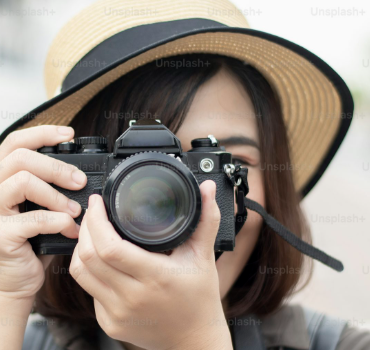

In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from google.colab.patches import cv2_imshow

# Step 1: Load training images (already cropped face regions)
def load_image(path, size=(100, 100)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # convert to grayscale
    img = cv2.resize(img, size)
    return img.flatten()  # flatten to 1D feature vector

# Paths to training images
X = []
y = []

# Training data: 2 labeled images
X.append(load_image("/content/image1.png"))
y.append("an")

X.append(load_image("/content/image2.png"))
y.append("vinh")

# Step 2: Train KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Step 3: Load and classify test image
test_image_path = "/content/image.png"
test_image = load_image(test_image_path)
predicted_label = knn.predict([test_image])[0]

# Step 4: Show result
print(f"Predicted label: {predicted_label}")

# Optional: show the test image
img_to_show = cv2.imread(test_image_path)
cv2_imshow(img_to_show)